# MAC0317/MAC5920
## Introdução ao Processamento de Sinais Digitais
## Seção 7.5: Bancos de Filtros para Sinais Finitos

In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import pywt
from ipywidgets import Dropdown, interactive

### Seção 7.5.1: Estratégias de extensão

Para estender a ideia de bancos de filtros para sinais finitos, adotaremos a estratégia de estender o sinal finito para o contexto bi-infinito.

Seja $x\in\mathbb{C}^N$. Queremos representá-lo através de um sinal $\tilde{x}\in L^2(\mathbb{Z})$. Algumas opções são:

> 1. extensão com zeros

$$\tilde{x}_k = \left\{\begin{array}{ll}
			x_k, & \text{ }k\in\{0, 1, \dots, N-1\} \\
			0, & \text{ c.c.}
		\end{array}\right.$$
> 2. extensão periódica

$$\tilde{x}_k = x_{k\mod N},\quad\forall k\in\mathbb{Z}$$
> 3. espelhamento + extensão periódica

$$\begin{align*}
		\hat{x}_k &= \left\{\begin{array}{ll}
			x_k, & k = 0, \dots, N-1 \\
			x_{2N-k-1}, & k = N, \dots, 2N-1 
		\end{array}\right. \\
		\tilde{x}_k &= \hat{x}_{k\mod 2N},\quad\forall k\in\mathbb{Z}
	\end{align*}$$

A extensão periódica do tipo 2 corresponde ao sinal

$$\ldots,x_{N-2},x_{N-1},\overbrace{x_0,x_1,\ldots,x_{N-2},x_{N-1}},x_0,x_1,\ldots$$

ao passo que a extensão do tipo 3 corresponde a

$$\ldots,x_{3},x_{2},x_1,x_0,\overbrace{x_0,x_1,\ldots,x_{N-2},x_{N-1}},x_{N-1},x_{N-2},\ldots$$

e é também chamada de *extensão simétrica de meio-ponto* pois o espelhamento ocorre entre duas amostras. Existe também a *extensão simétrica de ponto inteiro*:

$$\ldots,x_{3},x_{2},x_1,\overbrace{x_0,x_1,\ldots,x_{N-2},x_{N-1}},x_{N-2},\ldots$$

Observe que nenhuma dessas extensões geram sinais de energia finita (em $L^2(\mathbb{Z})$). Será necessário fazer uma espécie de *gambiarra* para permitir o uso daquela teoria.

### Extensões pseudo-periódicas

As extensões 2 e 3 acima podem ser feitas um número finito de vezes, para garantir que $\tilde{x}\in L^2(\mathbb{Z})$. A título de exemplo, desenvolveremos a DWT em $\mathbb{C}^N$ a partir da extensão periódica (caso 2 acima). Trabalharemos com extensões que chamaremos de *pseudo-periódicas*: para $q$ "grande o suficiente" definiremos:

\begin{equation*}
	\tilde{x}_k = \left\{\begin{array}{ll}
		x_{k\mod N}, & -qN\leq k\leq +qN \\
		0, & \text{c.c.}
	\end{array}\right.
\end{equation*}

### Análise da extensão periódica

Por sua maior simplicidade, consideraremos a extensão periódica sem reflexões simétricas na análise do banco de filtros.

**Teorema 7.5.1:** Seja $x\in\mathbb{C}^N$, e considere um banco de filtros $\{l_a,h_a,l_s,h_s\}$ que satisfaz a propriedade de reconstrução perfeita, onde todos os filtros tem $N$ ou menos coeficientes. Se interpretarmos esses filtros como elementos de $\mathbb{C}^N$ tomando os índices módulo $N$, e se tomarmos todas as convoluções como convoluções circulares em $\mathbb{C}^N$, então a transformação

$$x\mapsto X=(X_l,X_h)=(D(x*l_a),D(x*h_a))\quad\quad\left(\mathbb{C}^N\mapsto\mathbb{C}^N\right)$$

é inversível, e sua inversa é dada por

$$X\mapsto x=l_s*U(X_l)+h_s*U(X_h)\quad\quad\left(\mathbb{C}^N\mapsto\mathbb{C}^N\right).$$

**Prova:** Mostraremos que a utilização da transformada baseada em um banco de filtros com reconstrução perfeita no sinal $\tilde{x}\in L^2(\mathbb{Z})$ equivale à mesma sequência de operações em $\mathbb{C}^N$ a partir de $x\in\mathbb{C}^N$, interpretando as convoluções como convoluções circulares. Pela propriedade de reconstrução perfeita em $L^2(\mathbb{Z})$, temos que os sinais

\begin{align*}
	\tilde{X}_l &= D(\tilde{x}*l_a), \\
	\tilde{X}_h &= D(\tilde{x}*h_a),
\end{align*}

onde $*$ é a convolução (linear) em $L^2(\mathbb{Z})$, permitem a reconstrução de $\tilde{x}$ através da expressão

\begin{equation*}
	\tilde{x} = U(\tilde{X}_l)*l_s + U(\tilde{X}_h)*h_s.
\end{equation*}

Dado $x\in\mathbb{C}^N$, podemos definir

\begin{equation*}
	X_l = D(x*l_a)\in\mathbb{C}^{N/2}
\end{equation*}

onde $*$ é a convolução circular

$$(x*l_a)_n = \sum\limits_{k=0}^{N-1}(l_a)_k x_{n-k},$$

e $D\in\mathbb{R}^{\frac{N}{2}\times N}$ é a matriz tal que $D_{i,2i}=1$ e $D_{i,j}=0$ caso contrário:

$$\begin{bmatrix}
1&0&0&0&0&0&\cdots&0\\
0&0&1&0&0&0&\cdots&0\\
0&0&0&0&1&0&\cdots&0\\
\vdots&&&&&&\ddots&\vdots\\
0&0&0&0&0&0&\cdots&1
\end{bmatrix}$$

Analogamente, definimos

\begin{equation*}
	X_h = D(x*h_a)\in\mathbb{C}^{N/2}.
\end{equation*}

Na etapa de ressíntese, vamos combinar $X_l$ e $X_h$ através da expressão

\begin{equation*}
	U(X_l)*l_s + U(X_h)*h_s = \hat{x}
\end{equation*}

e $U = D^T\in\mathbb{R}^{N\times\frac{N}{2}}$.

Queremos mostrar que $\hat{x}$ (versão ressintetizada em domínio finito) é idêntico a $x$.

Para fazer isso, vamos observar as correspondências entre $X_l$ e $\tilde{X}_l$ e entre $X_{h}$ e $\tilde{X}_h$. Note inicialmente que as convoluções linear (em $\mathbb{Z}$) e circular (em $\mathbb{C}^N$) coincidem nas amostras "centrais" $n=0,1,\ldots,N-1$:

\begin{align*}
	(\tilde{x}*l_a)_n &= \sum\limits_{-\infty}^\infty (l_a)_k\tilde{x}_{n-k} & \text{ (convolução linear)}\\
	 &= \sum\limits_{k=0}^{N-1}(l_a)_k\tilde{x}_{n-k}& \\
	&= \sum\limits_{k=0}^{N-1}(l_a)_k x_{(n-k\ \%\ N)}&\\
	&= (x*l_a)_n & \text{ (convolução circular)}
\end{align*}

pois $(l_a)_k = 0\text{ se }k\not\in\{0, 1, \dots, N-1\}$ e $\tilde{x}_{n-k}=x_{n-k}$ para $n,k\in\{0, 1, \dots, N-1\}$.

Um argumento semelhante mostra que $(x*h_a)_n = (\tilde{x}*h_a)_n$ para $n = 0, 1, \dots, N-1$.

A subamostragem $D$ preservará apenas as componentes de índice par, tanto no contexto infinito quanto no finito. Assim, a partir do conhecimento de $X_l, X_h\in\mathbb{C}^{N/2}$, podemos recuperar a informação completa de $\tilde{X}_l, \tilde{X}_h\in L^2(\mathbb{Z})$, sendo que

\begin{align*}
	(\tilde{X}_l)_{n+kN/2} &= (X_l)_n,\\
    (\tilde{X}_h)_{n+kN/2} &= (X_h)_n,&\text{ para }n = 0, 1, \dots, \frac{N}{2} - 1,\ \forall k\in\mathbb{Z}.
\end{align*}

Notando que as convoluções com os filtros $l_s,h_s$ de ressíntese possuem a mesma propriedade em relação às convoluções, podemos ver que, para $n=0,1,\ldots,N-1$, o sinal $\hat{x}\in\mathbb{C}^N$ reconstruído pela aplicação do banco de filtros em $\mathbb{C}^N$ coincide com o sinal $\tilde{x}\in L^2(\mathbb{Z})$ perfeitamente reconstruído em $L^2(\mathbb{Z})$ e portanto com o sinal finito original $x\in\mathbb{C}^N$:

\begin{align*}
	\hat{x}_n &= [U(X_l)*l_s + U(X_h)*h_s]_n &\text{(convolução circular em $\mathbb{C}^N$)} \\
	&= [U(X_l)*l_s]_n + [U(X_h)*h_s]_n\\
	&= [U(\tilde{X}_l)*l_s]_n + [U(\tilde{X}_h)*h_s]_n&\text{(convolução linear em $L^2(\mathbb{Z})$)} \\
	&= [U(\tilde{X}_l)*l_s + U(\tilde{X}_h)*h_s]_n \\
	&= \tilde{x}_n &\text{(reconstrução perfeita em $L^2(\mathbb{Z})$)}\\
	&= x_n
\end{align*}

**Exemplo 7.7:** considere a DWT com o banco de filtros de Haar ortogonalizado, que satisfaz $(l_s)_k = (l_a)_{-k}, \forall k$ e $(h_s)_k = (h_a)_{-k}, \forall k$, aplicada a um vetor $x\in\mathbb{C}^4$:

\begin{align*}
	X_l &= D(x*l_a) = D\left(\begin{pmatrix}
		x_0 \\ x_1 \\ x_2 \\ x_3
	\end{pmatrix}*\begin{pmatrix}
		\frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} \\ 0 \\ 0
	\end{pmatrix}\right) = \begin{pmatrix}
		\frac{x_0}{\sqrt{2}} + \frac{x_3}{\sqrt{2}} \\
		\frac{x_2}{\sqrt{2}} + \frac{x_1}{\sqrt{2}}
	\end{pmatrix} \\
	X_h &= D(x*h_a) = D\left(\begin{pmatrix}
		x_0 \\ x_1 \\ x_2 \\ x_3
	\end{pmatrix}*\begin{pmatrix}
		\frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}} \\ 0 \\ 0
	\end{pmatrix}\right) = \begin{pmatrix}
		\frac{x_0}{\sqrt{2}} - \frac{x_3}{\sqrt{2}} \\
		\frac{x_2}{\sqrt{2}} - \frac{x_1}{\sqrt{2}}
	\end{pmatrix}
\end{align*}

Assim

\begin{equation*}
	X = W_4^a\begin{pmatrix}
		x_0 \\ x_1 \\ x_2 \\ x_3
	\end{pmatrix}
\end{equation*}

onde

\begin{equation*}
	W_4^a = \begin{pmatrix}
		\frac{1}{\sqrt{2}} & 0 & 0 & \frac{1}{\sqrt{2}} \\
		0 & \frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0 \\
		\frac{1}{\sqrt{2}} & 0 & 0 & -\frac{1}{\sqrt{2}} \\
		0 & -\frac{1}{\sqrt{2}} & \frac{1}{\sqrt{2}} & 0
	\end{pmatrix}.
\end{equation*}

### Exemplo 7.8

Na ressíntese, temos $x = U(X_l)*l_s + U(X_h)*h_s$:

\begin{equation*}
	x = \begin{pmatrix}
		X_0 \\ 0 \\ X_1 \\ 0
	\end{pmatrix}*\begin{pmatrix}
		\frac{1}{\sqrt{2}} \\ 0 \\ 0 \\ \frac{1}{\sqrt{2}}
	\end{pmatrix} + \begin{pmatrix}
		X_2 \\ 0 \\ X_3 \\ 0
	\end{pmatrix}*\begin{pmatrix}
		\frac{1}{\sqrt{2}} \\ 0 \\ 0 \\ -\frac{1}{\sqrt{2}}
	\end{pmatrix}
	= \begin{pmatrix}
		\frac{X_0}{\sqrt{2}} \\ \frac{X_1}{\sqrt{2}} \\ \frac{X_1}{\sqrt{2}} \\ \frac{X_0}{\sqrt{2}}
	\end{pmatrix} + \begin{pmatrix}
		\frac{X_2}{\sqrt{2}} \\ -\frac{X_3}{\sqrt{2}} \\ \frac{X_3}{\sqrt{2}} \\ -\frac{X_2}{\sqrt{2}}
	\end{pmatrix}
	= \begin{pmatrix}
		\frac{X_0 + X_2}{\sqrt{2}} \\ \frac{X_1 - X_3}{\sqrt{2}} \\ \frac{X_1 + X_3}{\sqrt{2}} \\ \frac{X_0 - X_2}{\sqrt{2}}
	\end{pmatrix}
\end{equation*}

ou seja,

$$x=W_4^s\begin{pmatrix}
		X_0 \\ X_1 \\ X_2 \\ X_3
	\end{pmatrix}$$

onde

\begin{equation*}
	W_4^s = \begin{pmatrix}
		\frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}} & 0 \\
		0 & \frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{2}} \\
		0 & \frac{1}{\sqrt{2}} & 0 & \frac{1}{\sqrt{2}} \\
		\frac{1}{\sqrt{2}} & 0 & -\frac{1}{\sqrt{2}} & 0
	\end{pmatrix}
\end{equation*}

Observe que:

> - $W_4^s = (W_4^a)^T$
> - todas as colunas (e linhas) de $W_4^s$ e $W_4^a$ são ortogonais (2 a 2)


Logo

\begin{align*}
	W_4^s W_4^a &= I & \text{ (pois a IDWT é a inversa da DWT)} \\
	W_4^a (W_4^a)^T &= I & \text{ (ortonormalidade do banco de filtros)}
\end{align*}

### Seção 7.5.3: Formulação Matricial da DWT em $\mathbb{C}^N$

**DWT (Análise):** dado $x\in\mathbb{C}^N$,

\begin{align*}
	X &= \begin{bmatrix}
		X_l \\ X_h
	\end{bmatrix} \\
	&= \begin{bmatrix}
		D(x*l_a) \\ D(x*h_a)
	\end{bmatrix} \\
	&= \begin{bmatrix}
		DM_{l_a}x \\ DM_{h_a}x
	\end{bmatrix} \\
	&= \begin{bmatrix}
		DM_{l_a} \\ DM_{h_a}
	\end{bmatrix}x \\
	&= W_N^a x
\end{align*}

**IDWT (Síntese):** dado $X\in\mathbb{C}^N$,

\begin{align*}
	x &= U(X_l)*l_s + U(X_h)*h_s \\
	&= M_{l_s}UX_l + M_{h_s}UX_h \\
	&= \begin{bmatrix}
		M_{l_s}U & M_{h_s}U
	\end{bmatrix}\begin{bmatrix}
		X_l \\ X_h
	\end{bmatrix} \\
	&= W_N^s X
\end{align*}

#### Bancos de filtros adjuntos = bancos de filtros ortogonais

Se um banco de filtros possui a propriedade

\begin{align*}
	(l_s)_k &= (l_a)_{-k},\quad\quad \forall k \\
	(h_s)_k &= (h_a)_{-k},\quad\quad \forall k
\end{align*}

sendo denominados *filtros adjuntos* (ou *revertidos no tempo*), pode-se verificar (exercício 4.9) que

\begin{align*}
	M_{l_s} &= (M_{l_a})^T \\
	M_{h_s} &= (M_{h_a})^T.
\end{align*}

Veremos a seguir como essas propriedades conferem a propriedade de **ortogonalidade** ao banco de filtros.

Relembrando o fato que $U=D^T$, e usando as propriedades dos filtros adjuntos ($M_{l_s}=M_{l_a}^T$ e $M_{h_s}=M_{h_a}^T$), temos

\begin{align*}
	W_N^s &= \begin{bmatrix}
		M_{l_s}U & M_{h_s}U
	\end{bmatrix} \\
	&= \begin{bmatrix}
		(U^TM_{l_s}^T)^T & (U^TM_{h_s}^T)^T
	\end{bmatrix} \\
	&= \begin{bmatrix}
		(DM_{l_a})^T & (DM_{h_a})^T
	\end{bmatrix} \\
	&= \begin{bmatrix}
		DM_{l_a} \\ DM_{h_a}
	\end{bmatrix}^T \\
	&= (W_N^a)^T
\end{align*}

Em outras palavras, a matriz que representa a transformada de síntese para um banco de filtros adjuntos, além de ser a matriz **inversa** daquela que representa a transformada direta, **também é sua transposta**.


A propriedade

$$W_N^s = (W_N^a)^{-1} = (W_N^a)^T$$

implica em

$$W_N^a(W_N^a)^T = 
\left[\begin{array}{ccc}
&W_0^T&\\\hline&W_1^T&\\\hline&\vdots&\\\hline&W_{N-1}^T&
\end{array}\right]\left[\begin{array}{c|c|c|c}\\
W_0&W_1&\cdots&W_{N-1}\\\\
\end{array}\right]
= I,$$

de onde 

$$
(W_k,W_l)=\left\{\begin{array}{ll}
1,&k=l,\\
0,&k\neq l
\end{array}\right.
$$

ou seja, as matrizes $W_N^s$ e $W_N^a$ são matrizes *unitárias*, e suas linhas e colunas formam *bases ortonormais* para $\mathbb{C}^N$. 

Em particular, da equação de síntese

$$x = W_N^sX = \left[\begin{array}{c|c|c|c}\\
W_0&W_1&\cdots&W_{N-1}\\\\
\end{array}\right]X = \sum_{k=0}^{N-1}W_kX_k,$$

vemos que a base ortonormal formada pelas colunas $\{W_k\}$ de $W_N^s$ (=linhas de $W_N^a$) corresponde às formas básicas de onda usadas pela DWT.

Adicionalmente, vemos pela equação de análise

$$X=W_N^ax=(W_N^s)^Tx=\left[\begin{array}{ccc}
W_0^T\\W_1^T\\\vdots\\W_{N-1}^T
\end{array}\right]x = \left[\begin{array}{ccc}
W_0^Tx\\W_1^Tx\\\vdots\\W_{N-1}^Tx
\end{array}\right] = \left[\begin{array}{c}
(x,W_0)\\(x,W_1)\\\vdots\\(x,W_{N-1})
\end{array}\right]$$

que cada coeficiente $X_k$ da DWT é definido pelo produto interno entre $x$ e a $k$-ésima forma básica de onda da DWT, como ocorria nas outras transformadas que estudamos.

### Seção 7.5.4: Formulação Matricial da DWT de Vários Níveis

### DWT de 2 níveis

Lembrando do diagrama

$$x\mapsto
\left[\begin{array}{c}
X_{l}\\
X_{h}
\end{array}\right]\mapsto
\left[\begin{array}{c}
X_{ll}\\
X_{lh}\\
X_{h}
\end{array}\right]$$

podemos escrever

\begin{equation*}
	X^{(2)} = \overbrace{\begin{pmatrix}
		W_{N/2}^a & 0 \\
		0 & I
	\end{pmatrix}W_N^a}^{W_N^{a,(2)}}x= W_N^{a,(2)}x.
\end{equation*}

**Observe** que as últimas $N/2$ linhas de $W_N^{a,(2)}$ são idênticas às de $W_N^a$ (associada aos coeficientes $X_h$), sendo que apenas as primeiras $N/2$ linhas diferem (pela multiplicação por $W_{N/2}^a$).

### DWT de 3 níveis

$$x\mapsto
\left[\begin{array}{c}
X_{l}\\
X_{h}
\end{array}\right]\mapsto
\left[\begin{array}{c}
X_{ll}\\
X_{lh}\\
X_{h}
\end{array}\right]\mapsto
\left[\begin{array}{c}
X_{lll}\\
X_{llh}\\
X_{lh}\\
X_{h}
\end{array}\right]$$

\begin{equation*}
	X^{(3)} = \overbrace{\begin{pmatrix}
		W_{N/4}^a & 0 & 0 \\
		0 & I & 0  \\
		0 & 0 & I 
	\end{pmatrix}W_N^{a,(2)}}^{W_N^{a,(3)}}x= W_N^{a,(3)}x
\end{equation*}

**Observe** que as últimas $3N/4$ linhas de $W_N^{a,(3)}$ são idênticas às de $W_N^{a,(2)}$ e de $W_N^{a}$ (pois estão associadas aos coeficientes $X_{lh},X_h$), sendo que apenas as primeiras $N/4$ linhas diferem (pela multiplicação por $W_{N/4}^a$).

**Observação:** é possível generalizar esse processo por indução.

### Custo de implementação da DWT de vários níveis

É fácil ver que o custo de implementação da DWT, independentemente do número de níveis, 
é sempre **linear**, se considerarmos que os filtros têm uma quantidade pequena $\mathcal{O}(1)$ de coeficientes.

Isso ocorre pois cada estágio terá custo linear (limitado por $\alpha L$) na quantidade $L$ de coeficientes processados, e essa quantidade será $L=N$ no 1° estágio, $L=N/2$ no 2° estágio, e assim por diante, logo o custo total será limitado por

$$\alpha\left(N+\frac{N}{2}+\frac{N}{4}+\cdots\right)\le \alpha 2 N.$$

### Exemplo 7.9

Voltamos ao sinal do exemplo 7.2, para inspecionar as transformadas de vários estágios:

$$\begin{array}{llllllll}
X^{(1)}=&(&X_{l},&&&&X_h&)\\
X^{(2)}=&(&X_{ll},&&&X_{lh},&X_h&)\\
X^{(3)}=&(&X_{lll},&&X_{llh},&X_{lh},&X_h&)\\
X^{(4)}=&(&X_{llll},&X_{lllh},&X_{llh},&X_{lh},&X_h&)
\end{array}$$

In [2]:
N = 1024;x = np.zeros(1024);x[0:350] = np.sin(2 * m.pi * 12 *  np.arange(0, 1, 1/N)[:350]) 
x[350:500] = 0.8 * np.ones(150);x[500:800] = 0.3 * np.ones(300)

def plotdwt(j):
    fig, ax = plt.subplots(1,1, figsize=(15, 3))
    coeffs = pywt.wavedec(x, 'haar', level=j)
    ax.plot(np.concatenate(coeffs))
    if j>0:
        ax.set_title(f"DWT (Haar) de {j} etapa(s)")
    else:
        ax.set_title(f"Sinal original")
    plt.show()

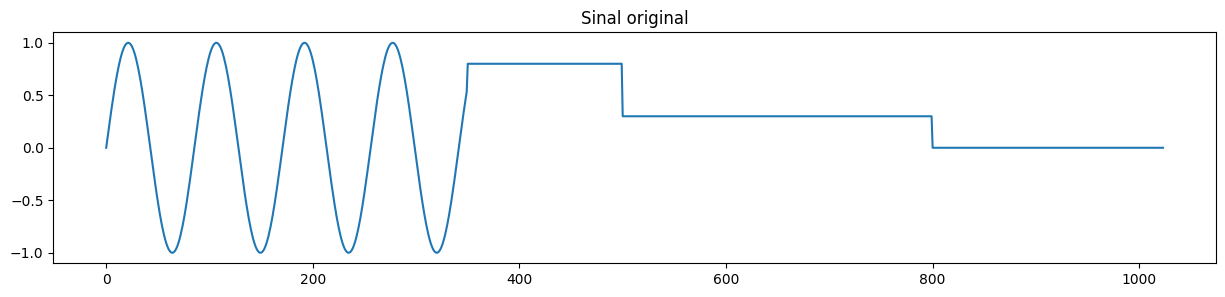

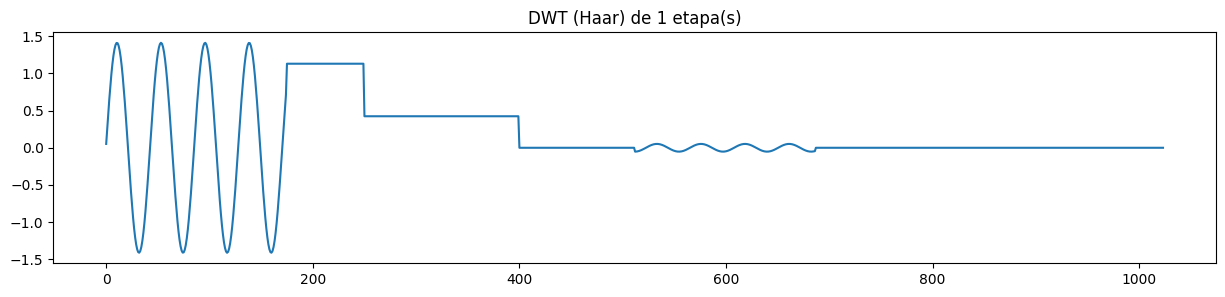

In [3]:
plotdwt(0)
plotdwt(1)

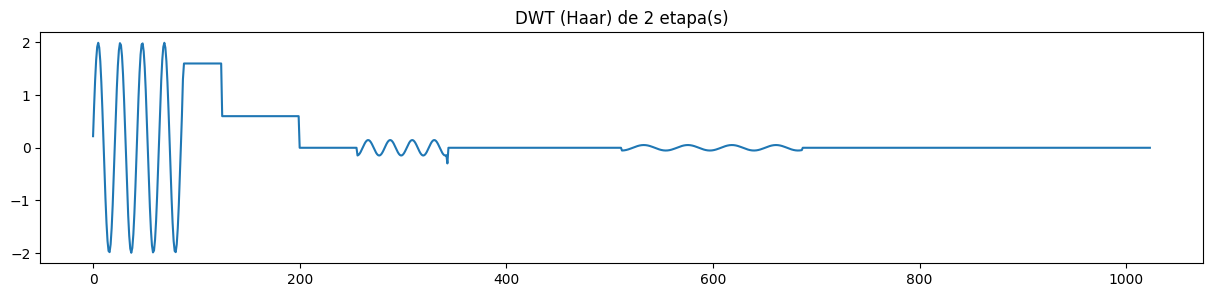

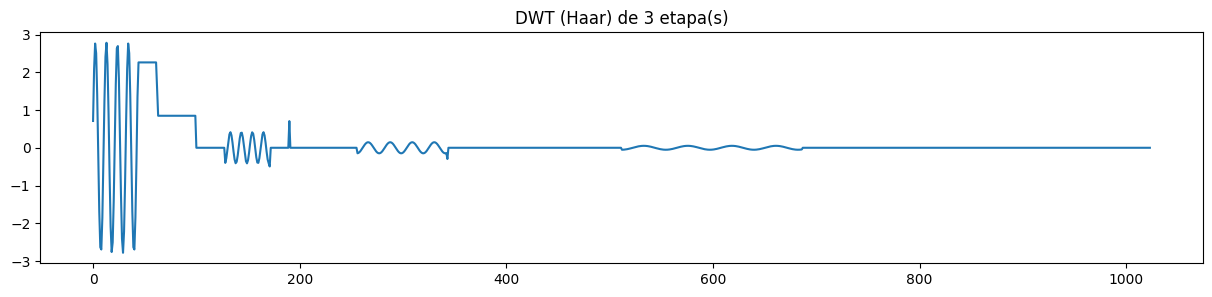

In [4]:
plotdwt(2)
plotdwt(3)

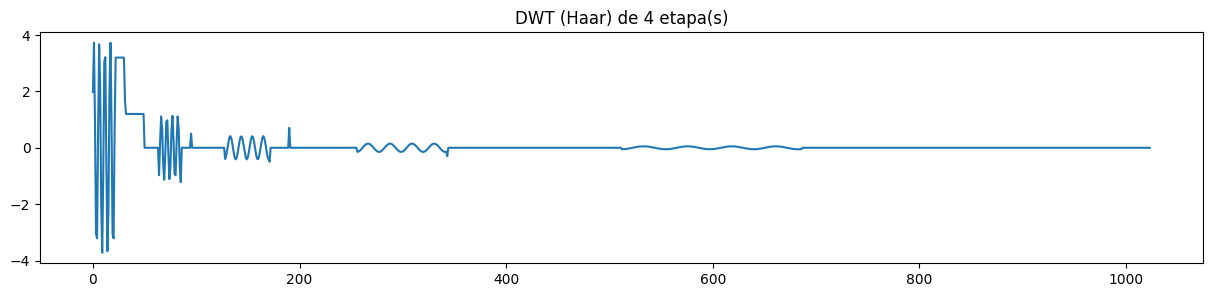

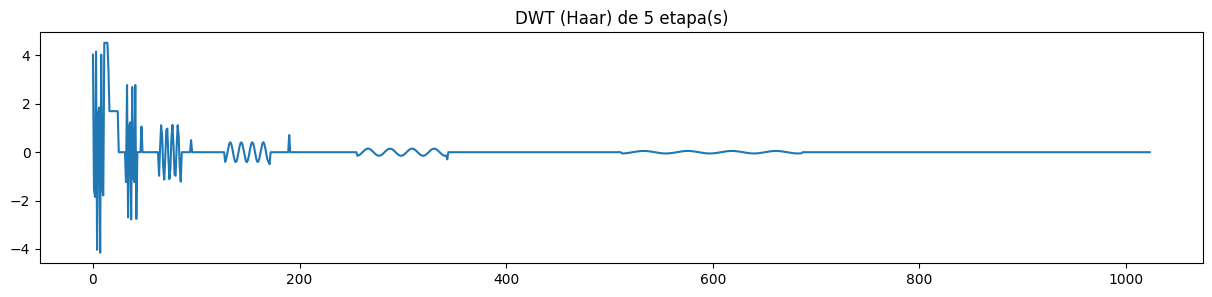

In [5]:
plotdwt(4)
plotdwt(5)

### Reconstrução da DWT por camadas

No primeiro nível da DWT, temos

\begin{array}{llll}
	x & = W_N^s\begin{pmatrix}
		X_l \\ X_h
	\end{pmatrix}\\
	&= W_N^s \begin{pmatrix}
		X_l \\ 0
	\end{pmatrix} &+& W_N^s \begin{pmatrix}
		0 \\ X_h
	\end{pmatrix}\\
    &= \alpha_1(x) &+& \delta_1(x)
\end{array}

onde $\alpha_1$ é a reconstrução usando *apenas* os coeficientes de aproximação (como se $X_h$ fosse $=0$), e $\delta_1$ a reconstrução usando *apenas* os coeficientes de detalhes (como se $X_l$ fosse $=0$). Chamamos as reconstruções $\alpha_1$ e $\delta_1$ de aproximação e detalhes de 1$^a$ ordem.

Considere agora a DWT de segunda ordem. Podemos escrever

\begin{align*}
	x &= W_N^{s,(2)}\left(\begin{pmatrix}
		X_{ll} \\ 0 \\ 0
	\end{pmatrix} + \begin{pmatrix}
		0 \\ X_{lh} \\ 0
	\end{pmatrix} + \begin{pmatrix}
		0 \\ 0 \\ X_h
	\end{pmatrix}\right) \\
	&= W_N^{s,(2)}\begin{pmatrix}
		X_{ll} \\ 0 \\ 0
	\end{pmatrix} + W_N^{s,(2)}\begin{pmatrix}
		0 \\ X_{lh} \\ 0
	\end{pmatrix} + W_N^{s}\begin{pmatrix}
		0 \\ 0 \\ X_h
	\end{pmatrix} \\
	&= \alpha_2(x) + \delta_2(x) + \delta_1(x)
\end{align*}

onde $\alpha_2(x)$ é chamado de aproximação de 2$^a$ ordem, $\delta_2(x)$ são os detalhes de 2$^a$ ordem e $\delta_1(x)$ os detalhes de 1$^a$ ordem.

No caso da DWT de terceira ordem, temos

\begin{align*}
	x &= W_N^{s,(3)}\begin{pmatrix}
		X_{lll} \\ 0 \\ 0 \\ 0
	\end{pmatrix} + W_N^{s,(3)}\begin{pmatrix}
		0 \\ X_{llh} \\ 0 \\ 0
	\end{pmatrix} + W_N^{s,(2)}\begin{pmatrix}
		0 \\ 0 \\ X_{lh} \\ 0
	\end{pmatrix} + W_N^s\begin{pmatrix}
		0 \\ 0 \\ 0 \\ X_{h}
	\end{pmatrix} \\
	&= \alpha_3(x) + \delta_3(x) + \delta_2(x) + \delta_1(x)
\end{align*}

e em geral

\begin{equation*}
	\alpha_r(x) = \alpha_{r+1}(x) + \delta_{r+1}(x)
\end{equation*}

ou

\begin{equation*}
	\alpha_{r+1} = \alpha_r(x) - \delta_{r+1}(x)
\end{equation*}

## Figuras 7.14 e 7.15

Neste exemplo veremos mais uma vez as reconstruções do sinal do exemplo 7.2, usando apenas os coeficientes de aproximação de ordem $M$.

In [6]:
# Função para calcular a distorção
def distortion(x,l):                                                            
    return np.linalg.norm(x-l)**2/ np.linalg.norm(x)**2

r = Dropdown(options=[(t,t) for t in pywt.wavelist(kind='discrete')], value='haar', 
             description='Familias de Wavelet: ', style={'description_width': 'initial'})

# Wavelets utlizadas no livro: Haar -> haar; Daubechies 4-Tap -> db2; LeGall 5/3 -> bior2.2
def plot_reconstruction(family):
    fig, ax = plt.subplots(2 ,2, figsize=(15, 8))
    gs = ax[0, 0].get_gridspec()

    for j in range(4):
        coef = pywt.wavedec(x, family, mode='zero', level=j+1)
        #reconstroi apenas utilizando os coeficientes de aproximação para o nivel j+1
        y = pywt.upcoef('a', coef[0], family, level=j+1, take=len(x))
        index = j // 2, j % 2
        ax[index].plot(y)
        ax[index].set_title(f"Aproximação de {j+1}$^a$ ordem: erro = {100*distortion(x,y):2.2f}%")
        ax[index].set_ylabel('amplitude')               
    plt.show()

In [7]:
interactive(plot_reconstruction, family=r,)

interactive(children=(Dropdown(description='Familias de Wavelet: ', index=71, options=(('bior1.1', 'bior1.1'),…